**EJEMPLO DE REGRESIÓN LINEAL MÚLTIPLE**

**PREDICCIÓN PRECIO AUTOMÓVIL**

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## FASE 1: RECOLECCIÓN DE DATOS

In [3]:
car_data = pd.read_csv('car_data.csv')

In [4]:
car_data.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


## FASE 2: EXPLORACIÓN DE DATOS

In [5]:
# Nombre de las columnas
car_data.columns

Index(['Model', 'Selling Price', 'Kilometers Driven', 'Year', 'Owner',
       'Fuel Type', 'Transmission', 'Insurance', 'Car Condition'],
      dtype='object')

In [9]:
# Número de filas y de columnas
car_data.shape

(2237, 9)

In [10]:
# Get statistical data from the dataframe
car_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Selling Price,2237.0,418443.068842,228051.595437,75299.0,272099.0,355799.0,503299.0,1952397.0
Kilometers Driven,2237.0,61928.605275,42260.955917,913.0,32137.0,55430.0,83427.0,855881.0
Year,2237.0,2013.763523,2.874686,2006.0,2012.0,2014.0,2016.0,2020.0
Car Condition,2237.0,4.370854,0.288990,3.0,4.2,4.3,4.6,5.0


In [11]:
# Get data dataTypes
car_data.dtypes

Model                 object
Selling Price          int64
Kilometers Driven      int64
Year                   int64
Owner                 object
Fuel Type             object
Transmission          object
Insurance             object
Car Condition        float64
dtype: object

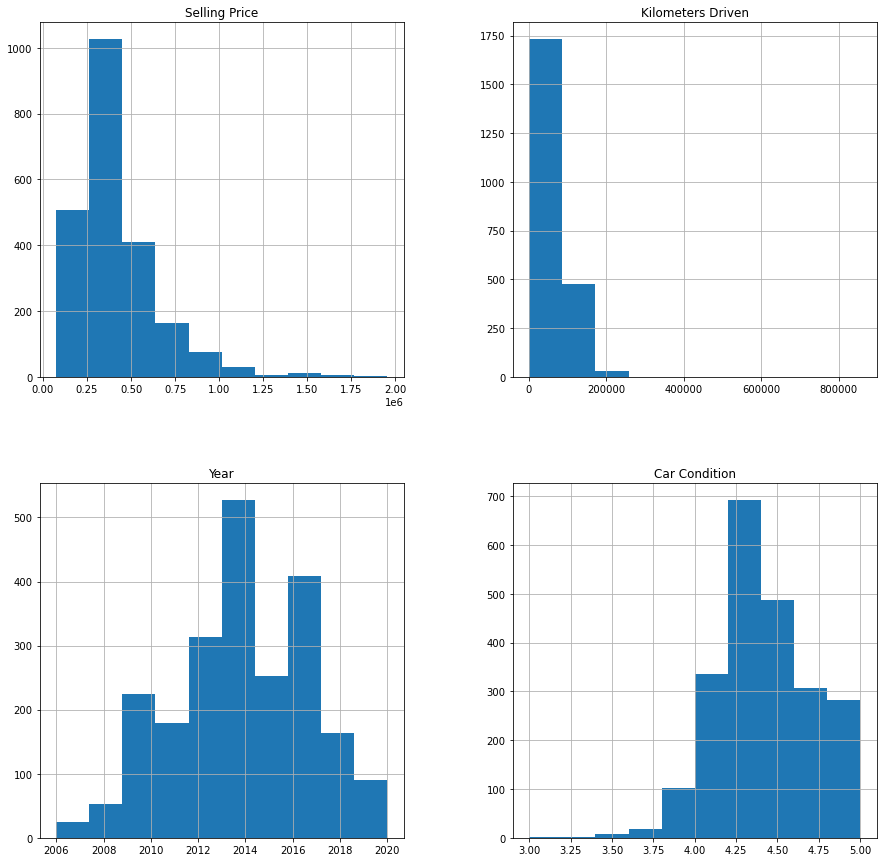

In [7]:
# Histográmas de las variables cualitativas
car_data.hist(figsize=(15,15))
plt.show()

Text(0.5, 1.0, 'Year vs Price')

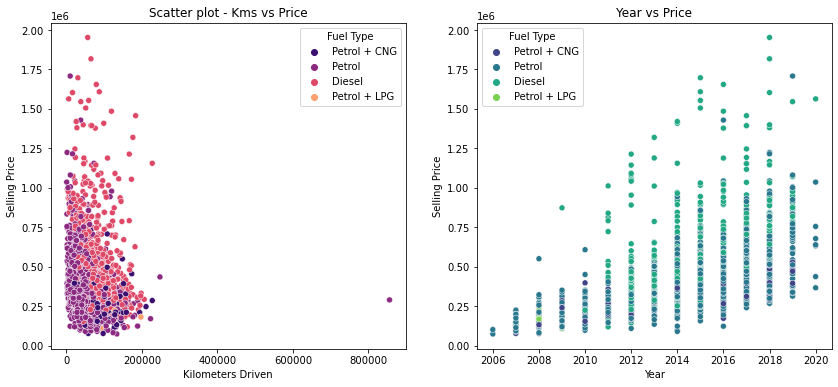

In [8]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Kilometers Driven', y='Selling Price', data=car_data, palette='magma', hue='Fuel Type', ax=ax)
ax.set_title('Scatter plot - Kms vs Price')

ax = f.add_subplot(122)
sns.scatterplot(x='Year', y='Selling Price', data=car_data, palette='viridis', hue='Fuel Type', ax=ax)
ax.set_title('Year vs Price')

<AxesSubplot:>

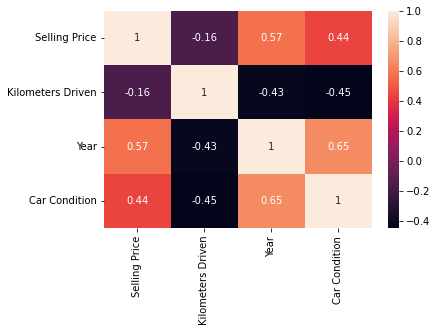

In [9]:
corr = car_data.corr()
sns.heatmap(corr, annot=True)

In [10]:
car_data.isnull().sum()

Model                 0
Selling Price         0
Kilometers Driven     0
Year                  0
Owner                 0
Fuel Type             0
Transmission          0
Insurance            14
Car Condition         0
dtype: int64

In [6]:
car_data = car_data.dropna()

In [7]:
car_data.isnull().sum()

Model                0
Selling Price        0
Kilometers Driven    0
Year                 0
Owner                0
Fuel Type            0
Transmission         0
Insurance            0
Car Condition        0
dtype: int64

## 3. FASE DE ENTRENAMIENTO Y VALIDACIÓN

HIPÓTESIS 1: Utilizando sólo variables numéricas

Dado que los modelos sólo aceptan variables numéricas, vamos a eliminar todas aquellas variables que no lo son

In [8]:
# Preparamos el dataset de la hipótisis 1
# Borramos las columnas categóricas
categorical_columns = ['Model', 'Fuel Type', 'Transmission', 'Owner', 'Insurance']
car_data_hipot1 = car_data.drop(categorical_columns, axis=1)

In [9]:
car_data_hipot1.head()

,Selling Price,Kilometers Driven,Year,Car Condition
0,312165,82238,2014,4.2
1,313799,30558,2013,4.4
2,295999,22164,2018,4.8
3,435199,30535,2013,4.3
4,289099,15738,2013,4.3


In [10]:
X_hipot1 = car_data_hipot1.drop('Selling Price', axis=1) # Variables independientes
y_hipot1 = car_data_hipot1['Selling Price'] # Variable dependiente

In [12]:
# Preparamos el train data y el test data
from sklearn.model_selection import train_test_split

X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.2, random_state=43)

In [13]:
# LinearRegression
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

In [14]:
# FASE VALIDACION

# Importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error




In [16]:
# Predecimos los valores y para los datos usados en el entrenamiento
prediction_entrenamiento = regresion_lineal.predict(X_hipot1_train)

# Calculamos el MSE
mse_hipot1_train = mean_squared_error(y_true=y_hipot1_train, y_pred=prediction_entrenamiento)
print(f'Error cuadrático medio (MSE) TRAIN {mse_hipot1_train}')

# Predecimos los valores y para los datos de validación
prediction_validacion = regresion_lineal.predict(X_hipot1_test)

# Calculamos el MSE
mse_hipot1_test = mean_squared_error(y_true=y_hipot1_test, y_pred=prediction_validacion)
print(f'Error cuadrático medio (MSE) TEST {mse_hipot1_test}')


Error cuadrático medio (MSE) TRAIN 34410499034.42077
Error cuadrático medio (MSE) TEST 32710568016.668434


HIPÓTESIS 2: Transformamos las variables categóricas en variables numéricas

Para ello, utilizaremos una técnica llamada one_hot_encoding que permite transformar en un conjunto de 1 y 0 una variable categórica. Por ejemplo, si tuviéramos una variable denominada color, con los valores Azul, Rojo, y Verde, el one_hot_encoding crearía 3 variables, color_Azul, color_Rojo, color_Verde con los valores 1 y 0 dependiendo de si el valor de la variable original era azul, rojo o verde.

In [17]:
car_data.dtypes

Model                 object
Selling Price          int64
Kilometers Driven      int64
Year                   int64
Owner                 object
Fuel Type             object
Transmission          object
Insurance             object
Car Condition        float64
dtype: object

In [21]:
# Preparamos el dataset de la hipótesis 2
# Vamos a tratar algunas de las variables categóricas con la técnica de one_hot_encoding

categorical_columns_2 = ['Owner', 'Fuel Type', 'Transmission', 'Insurance']
car_data_hipot2 = pd.get_dummies(data=car_data, prefix='OHE', prefix_sep='_', columns=categorical_columns_2, drop_first=True, dtype='int8')

In [22]:
car_data_hipot2.head()

,Model,Selling Price,Kilometers Driven,Year,Car Condition,OHE_Second Owner,OHE_Third Owner,OHE_Petrol,OHE_Petrol + CNG,OHE_Petrol + LPG,...,OHE_31-12-2020,OHE_31-12-2021,OHE_3rd Party,OHE_Comp,OHE_Comprehensive,OHE_Expired,OHE_Insurance Expired,OHE_Third_party,OHE_Zero Depreciation,OHE_Zero_Dep
0,MarutiWagonR1.0LXI,312165,82238,2014,4.2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,ToyotaEtiosLiva,313799,30558,2013,4.4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MarutiAlto800,295999,22164,2018,4.8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MarutiSwift,435199,30535,2013,4.3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,MarutiWagonR1.0,289099,15738,2013,4.3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Eliminamos la columna Model
car_data_hipot2 = car_data_hipot2.drop('Model', axis=1)

In [24]:
car_data_hipot2.head()

,Selling Price,Kilometers Driven,Year,Car Condition,OHE_Second Owner,OHE_Third Owner,OHE_Petrol,OHE_Petrol + CNG,OHE_Petrol + LPG,OHE_DL10,...,OHE_31-12-2020,OHE_31-12-2021,OHE_3rd Party,OHE_Comp,OHE_Comprehensive,OHE_Expired,OHE_Insurance Expired,OHE_Third_party,OHE_Zero Depreciation,OHE_Zero_Dep
0,312165,82238,2014,4.2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,313799,30558,2013,4.4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,295999,22164,2018,4.8,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,435199,30535,2013,4.3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,289099,15738,2013,4.3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_hipot2 = car_data_hipot2.drop('Selling Price', axis=1) # Variables independientes
y_hipot2 = car_data_hipot2['Selling Price'] # Variable dependiente

In [26]:
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.2, random_state=43)

In [27]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot2_train, y_hipot2_train)

LinearRegression()

In [28]:
# Predecimos los valores y para los datos usados en el entrenamiento
prediction_entrenamiento = regresion_lineal.predict(X_hipot2_train)

# Calculamos el MSE
mse_hipot2_train = mean_squared_error(y_true=y_hipot2_train, y_pred=prediction_entrenamiento)
print(f'Error cuadrático medio (MSE) TRAIN {mse_hipot2_train}')

# Predecimos los valores y para los datos de validación
prediction_validacion = regresion_lineal.predict(X_hipot2_test)

# Calculamos el MSE
mse_hipot2_test = mean_squared_error(y_true=y_hipot2_test, y_pred=prediction_validacion)
print(f'Error cuadrático medio (MSE) TEST {mse_hipot2_test}')

Error cuadrático medio (MSE) TRAIN 18711749931.177658
Error cuadrático medio (MSE) TEST 2.041477424133804e+22


HIPÓTESIS 3: Normalización de variable objetivo.

Para ello utlizaremos los mecanismos que nos ofrece ScikitLearn para normalizar con los distintos Scaler que posee.

In [37]:
car_data_hipot3 = pd.get_dummies(data=car_data, prefix='OHE', prefix_sep='_', columns=categorical_columns_2, drop_first=True, dtype='int8')

In [38]:
car_data_hipot3 = car_data_hipot3.drop('Model', axis=1)

In [43]:
X_hipot3 = car_data_hipot3.drop('Selling Price', axis=1) # Variables independientes
y_hipot3 = car_data_hipot3['Selling Price'] # Variable dependiente

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Los algoritmos de preprocessing de sklearn están preparados para convertir matrices, por lo que tenemos que hacer una transformación de 
# nuestra variable y ya que es una variable de tipo Series
#para ello, hacemos un .to_numpy() que nos convierte la serie en un array y luego hacemos reshape (-1, 1) que transforma un array de 1xn en una
#matriz de nx1
y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))

# Volvemos a transformar nuestra variable en un array de 1xn
y_hipot3 = y_hipot3.reshape(1,-1)[0]

In [49]:
X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.2, random_state=43)

In [50]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot3_train, y_hipot3_train)

LinearRegression()

In [51]:
# Predecimos los valores y para los datos usados en el entrenamiento
prediction_entrenamiento = regresion_lineal.predict(X_hipot3_train)

# Calculamos el MSE
mse_hipot3_train = mean_squared_error(y_true=y_hipot3_train, y_pred=prediction_entrenamiento)
print(f'Error cuadrático medio (MSE) TRAIN {mse_hipot3_train}')

# Predecimos los valores y para los datos de validación
prediction_validacion = regresion_lineal.predict(X_hipot3_test)

# Calculamos el MSE
mse_hipot3_test = mean_squared_error(y_true=y_hipot3_test, y_pred=prediction_validacion)
print(f'Error cuadrático medio (MSE) TEST {mse_hipot3_test}')

Error cuadrático medio (MSE) TRAIN 0.3611683027840423
Error cuadrático medio (MSE) TEST 394039541549.1389


HIPÓTESIS 5: Utilizando otro escalado

In [59]:
car_data_hipot5 = pd.get_dummies(data=car_data, prefix='OHE', prefix_sep='_', columns=categorical_columns_2, drop_first=True, dtype='int8')

In [60]:
car_data_hipot5 = car_data_hipot5.drop('Model', axis=1)

In [61]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

car_data_hipot5[['Kilometers Driven', 'Selling Price']] = scaler.fit_transform(car_data_hipot5[['Kilometers Driven', 'Selling Price']])

In [62]:
X_hipot5 = car_data_hipot5.drop('Selling Price', axis=1) # Variables independientes
y_hipot5 = car_data_hipot5['Selling Price'] # Variable dependiente

In [63]:
X_hipot5_train, X_hipot5_test, y_hipot5_train, y_hipot5_test = train_test_split(X_hipot5, y_hipot5, test_size=0.2, random_state=43)

In [64]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot5_train, y_hipot5_train)

LinearRegression()

In [65]:
# Predecimos los valores y para los datos usados en el entrenamiento
prediction_entrenamiento = regresion_lineal.predict(X_hipot5_train)

# Calculamos el MSE
mse_hipot5_train = mean_squared_error(y_true=y_hipot5_train, y_pred=prediction_entrenamiento)
print(f'Error cuadrático medio (MSE) TRAIN {mse_hipot5_train}')

# Predecimos los valores y para los datos de validación
prediction_validacion = regresion_lineal.predict(X_hipot5_test)

# Calculamos el MSE
mse_hipot5_test = mean_squared_error(y_true=y_hipot5_test, y_pred=prediction_validacion)
print(f'Error cuadrático medio (MSE) TEST {mse_hipot5_test}')

Error cuadrático medio (MSE) TRAIN 0.004908831688540743
Error cuadrático medio (MSE) TEST 0.008498384590177783
